This tutorial demonstrates runing Molecular Dynamics (MD) simulations on lattice systems.
First, import all the stuff we'll need

In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py import units
from libra_py import QE_methods
from libra_py import normal_modes

import py3Dmol   # molecular visualization
import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

In [ ]:
print os.getcwd()

f = open("mol_pos.xyz","r")
A = f.readlines()
f.close()

xyz = ""
for a in A:
    xyz = xyz + a
    
"""
view = py3Dmol.view(width=800,height=400)  
view.setBackgroundColor('0xeeeeee')                                     
view.zoomTo()                                                           
view.addModelsAsFrames(xyz, 'xyz')
view.setStyle({'sphere':{'colorscheme':'Jmol', }})                        
view.animate({'reps':0, 'loop':'forward', 'step':5})
view.show()  
"""

In [2]:
dt = 1.0*units.fs2au
PT = {"Pb":207.2,"I":126.9,"C":12.0, "H":1.0, "N":14.0 }
R, V, M, E = QE_methods.read_md_data_xyz("mol_pos.xyz", PT, dt)
R0, V0, M0, E0 = QE_methods.read_md_data_xyz("mol_pos_gs.xyz", PT, dt)
print V.num_of_rows, V.num_of_cols
print V0.num_of_rows, V0.num_of_cols

612 1082
612 2066


In [3]:
params = {"cov_flag":0, "visualize":0, "verbosity":1 }
res = normal_modes.compute_cov1( R, V, M, E, params)
res0 = normal_modes.compute_cov1( R0, V0, M0, E0, params)

========= Normal modes calculations according to: =============================
Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics        or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.

Computing covariance matrix of positions

Computing covariance matrix of velocities

Eigenvalue solver for covariance matrix of positions

Eigenvalue solver for covariance matrix of velocities

Angular frequencies (derived from w_v/w_r)
========= Done with the Normal modes calculations =============================
========= Normal modes calculations according to: =============================
Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics        or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.

Computing covariance matrix of positions

Computing covariance matrix of velocities

Eigenvalue solver for covariance matrix of positions

Eigenvalue solver for covariance matrix of velocities

Angular frequencies (derived from w

In [6]:
ndof = R.num_of_rows
dat, dat0 = [], []
for i in xrange(ndof):
    dat.append(res[1].get(i))
    dat0.append(res0[1].get(i))
    print "Mode %i   %5.0f  %5.0f cm^{-1}" % (i, res[1].get(i), res0[1].get(i) )

Mode 0   21587      0 cm^{-1}
Mode 1       0      0 cm^{-1}
Mode 2   11017   7748 cm^{-1}
Mode 3   11353   6557 cm^{-1}
Mode 4    8742   5517 cm^{-1}
Mode 5    9069      0 cm^{-1}
Mode 6    7974   4673 cm^{-1}
Mode 7    7428      0 cm^{-1}
Mode 8       0   4380 cm^{-1}
Mode 9    7328      0 cm^{-1}
Mode 10    7095   4036 cm^{-1}
Mode 11    6801   4031 cm^{-1}
Mode 12       0   3684 cm^{-1}
Mode 13    6614   3726 cm^{-1}
Mode 14    6461   3735 cm^{-1}
Mode 15       0   3568 cm^{-1}
Mode 16    6210   3606 cm^{-1}
Mode 17    6225   3440 cm^{-1}
Mode 18    6268      0 cm^{-1}
Mode 19    6266   3433 cm^{-1}
Mode 20    6088   3473 cm^{-1}
Mode 21    5948      0 cm^{-1}
Mode 22    5993   3340 cm^{-1}
Mode 23       0   3278 cm^{-1}
Mode 24    5941      0 cm^{-1}
Mode 25    5927   3245 cm^{-1}
Mode 26    5977   3153 cm^{-1}
Mode 27    5826   3062 cm^{-1}
Mode 28       0   3016 cm^{-1}
Mode 29    5725   3066 cm^{-1}
Mode 30    5520   3049 cm^{-1}
Mode 31    5508   3054 cm^{-1}
Mode 32    5462   

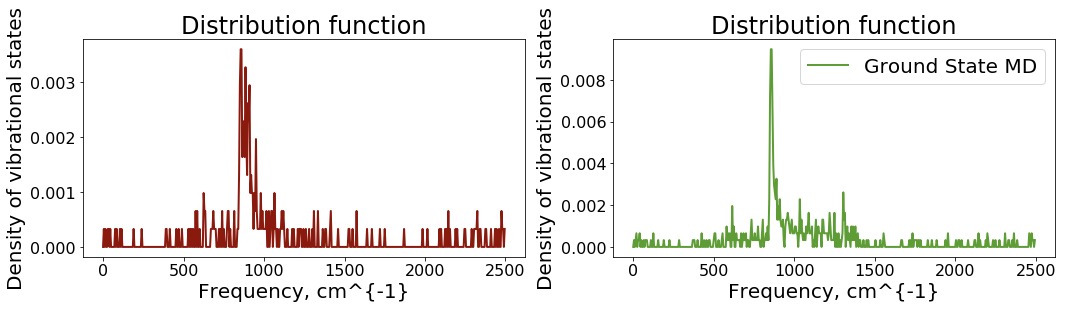

In [9]:
w = []
for i in xrange(500):
    w.append(5.0*i)

z = DATA(dat)
z0 = DATA(dat0)

dens, cum = z.Calculate_Distribution(w)
dens0, cum = z0.Calculate_Distribution(w)


plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Distribution function')
plt.xlabel('Frequency, cm^{-1}')
plt.ylabel('Density of vibrational states')
plt.plot(w, dens, label='Excited State MD', linewidth=2, color = colors["11"]) 

plt.subplot(1,2,2)
plt.title('Distribution function')
plt.xlabel('Frequency, cm^{-1}')
plt.ylabel('Density of vibrational states')
plt.plot(w, dens0, label='Ground State MD', linewidth=2, color = colors["21"]) 

plt.legend()
plt.show()
plt.close()

In [16]:
mode = 110
ampl = 500

# Method 1
xyz_nm = normal_modes.get_xyz(E,R, M, res[2], mode)  # velocity covariance
xyz_nm0 = normal_modes.get_xyz(E0,R0, M0, res0[2], mode)  # velocity covariance

view = py3Dmol.view(width=800,height=400, linked=False,viewergrid=(1,2))
view.addModel(xyz_nm,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(0,0))
view.addModel(xyz_nm0,'xyz',{'vibrate': {'frames':10,'amplitude':ampl}}, viewer=(0,1))

view.setBackgroundColor('0xeeeeee')
view.setStyle({'sphere':{}})
view.animate({'loop': 'backAndForth'})
view.zoomTo()
view.show()


You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol